<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

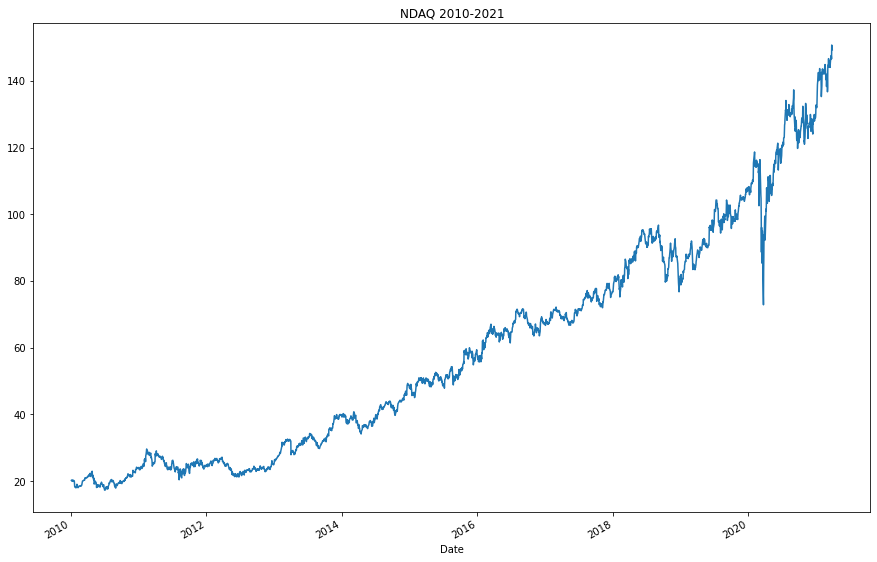

In [2]:
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from scipy.stats import skew
from sklearn.linear_model import LinearRegression

import numpy as np 
import seaborn as sns 
import pandas as pd
import plotly as ply

from scipy import stats

 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [3]:
#showing skew of original data 
skew(ts.Close)

0.6285473135201798

/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

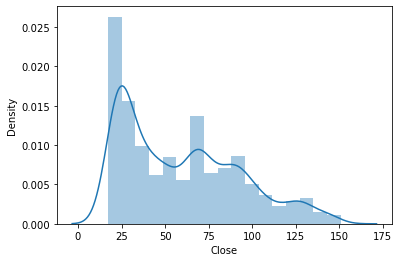

In [4]:
sns.distplot(ts.Close)

In [5]:
#johnson transformation 
transformed_data, fitted_lambda = stats.yeojohnson(ts.Close)
skew(transformed_data)

-0.015471996182550905

In [8]:
print(fitted_lambda)

0.06063966241919402


In [10]:
#manual johnson transformation
test_Data = ((ts.Close + 1)**fitted_lambda - 1) / fitted_lambda
skew(test_Data)

-0.015471996182550905

In [14]:
#attempt reverse 
restored_Data = (((fitted_lambda*test_Data)+1)**(1/fitted_lambda)) - 1
skew(restored_Data)

0.6285473135201793

In [31]:
#checking values in ts.Close that they are (stictly) positive/negative. For deciding which reverse transfrom to use
#here 0 is positive 
postive = 1
for x in ts.Close: 
    if x < 0:
        postive = 0
        
        
print(postive)

1


In [35]:
#Euler's number (for natrual log)
e = np.exp(1) 
print(e)

2.718281828459045


In [39]:
#different reverse transforms based on lambda and original data 
#generally our data should be all postive majority of the time so first function is the main one being used 
if fitted_lambda != 0 and postive == 1:
    
    restored_Data = (((fitted_lambda*test_Data)+1)**(1/fitted_lambda)) - 1
    print("First function")
    
elif fitted_lambda == 0 and postive == 1:
    
    e = np.exp(1)
    restored_Data = (e**transformed_data - 1)
    print("Second function")
    
elif fitted_lambda != 2 and postive == 0:
    
    restored_Data = -((((-transformed_data*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
    print("Third Function")
    
elif fitted_lambda == 2 and postive == 0:
    
    e = np.exp(1)
    restored_Data = (-e**-transformed_data) + 1
    print("Fourth function")

First function


In [40]:
#reversed data should equal original skew
skew(restored_Data)

0.6285473135201793

In [41]:
#original data, off by a negligble amount ..98 instead of 93
skew(ts.Close)

0.6285473135201798